In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [ ]:
from google.colab import files
file=files.upload()

Saving datesale.csv to datesale.csv


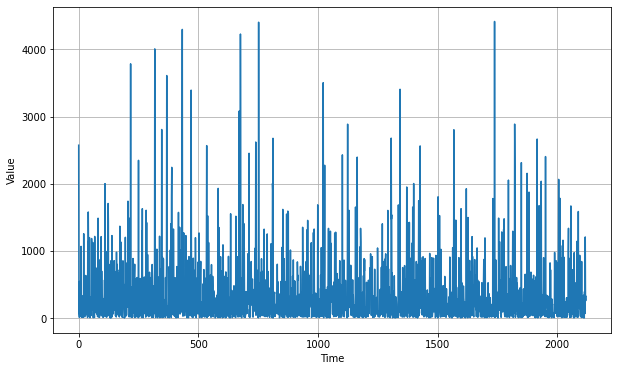

In [ ]:
import csv
time_step = []
temps = []

with open('datesale.csv') as csvfile:
# YOUR CODE HERE. READ TEMPERATURES INTO TEMPS
# HAVE TIME STEPS BE A SIMPLE ARRAY OF 1, 2, 3, 4 etc
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  step=0
  for row in reader:
    temps.append(float(row[1]))
    time_step.append(step)
    step = step + 1

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [ ]:
split_time = 2000
time_train = time[:split_time] # YOUR CODE HERE
x_train = series[:split_time] # YOUR CODE HERE
time_valid = time[split_time:]# YOUR CODE HERE
x_valid = series[split_time:]# YOUR CODE HERE

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
    # YOUR CODE HERE

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast
    # YOUR CODE HER

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
   tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
# YOUR CODE HERE
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
#model.save_weight('model.ckpt')
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(2000,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
8/8 [==============================] - 6s 299ms/step - loss: 324.4281 - mae: 324.9268
Epoch 2/100
8/8 [==============================] - 3s 288ms/step - loss: 324.0918 - mae: 324.5905
Epoch 3/100
8/8 [==============================] - 3s 284ms/step - loss: 323.5619 - mae: 324.0605
Epoch 4/100
8/8 [==============================] - 3s 291ms/step - loss: 322.9139 - mae: 323.4126
Epoch 5/100
8/8 [==============================] - 3s 285ms/step - loss: 322.1836 - mae: 322.6823
Epoch 6/100
8/8 [==============================] - 3s 287ms/step - loss: 321.3842 - mae: 321.8831
Epoch 7/100
8/8 [==============================] - 3s 284ms/step - loss: 320.5168 - mae: 321.0158
Epoch 8/100
8/8 [==============================] - 2s 283ms/step - loss: 319.5865 - mae: 320.0853
Epoch 9/100
8/8 [==============================] - 3s 286ms/step - loss: 318.5898 - mae: 319.0887
Epoch 10/100
8/8 [==============================] - 3s 289ms/step - loss: 317.5314 - mae: 318.0301
Epoch 11/100
8/8 [=

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 200])

KeyError: ignored

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
# YOUR CODE HERE
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5,momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=150)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
20/20 [==============================] - 6s 113ms/step - loss: 300.9814 - mae: 301.4807
Epoch 2/150
20/20 [==============================] - 2s 112ms/step - loss: 286.5819 - mae: 287.0813
Epoch 3/150
20/20 [==============================] - 2s 113ms/step - loss: 285.1140 - mae: 285.6134
Epoch 4/150
20/20 [==============================] - 2s 113ms/step - loss: 284.1445 - mae: 284.6439
Epoch 5/150
20/20 [==============================] - 2s 115ms/step - loss: 283.4570 - mae: 283.9564
Epoch 6/150
20/20 [==============================] - 2s 113ms/step - loss: 282.8883 - mae: 283.3876
Epoch 7/150
20/20 [==============================] - 2s 115ms/step - loss: 282.3561 - mae: 282.8553
Epoch 8/150
20/20 [==============================] - 2s 114ms/step - loss: 281.7931 - mae: 282.2922
Epoch 9/150
20/20 [==============================] - 2s 113ms/step - loss: 281.2090 - mae: 281.7082
Epoch 10/150
20/20 [==============================] - 2s 114ms/step - loss: 280.6793 - mae: 281.1785

TypeError: ignored

In [ ]:
from tensorflow import lite
converter=lite.TFLiteConverter.from_keras_model(model)
tfmodel=converter.convert()
open('datasale.tflite','wb').write(tfmodel)


INFO:tensorflow:Assets written to: /tmp/tmpc8fa70cq/assets


INFO:tensorflow:Assets written to: /tmp/tmpc8fa70cq/assets


269108

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

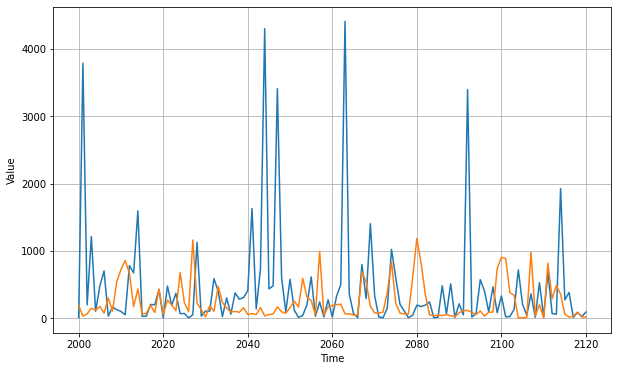

In [ ]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [ ]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

443.63406

In [ ]:
print(rnn_forecast)

[ 190.47386     31.79509     63.66168    149.62346    118.516525
  175.43283     75.61853    299.63745    106.025696   542.2541
  723.9003     856.58215    666.7664     171.72601    436.0283
   62.340973    72.69956    195.19247     86.09748    432.023
   57.357372   270.18896    199.40665    112.08276    679.9889
  231.42517    100.33336   1161.5203     224.62947    125.29808
   20.661545   185.81958    104.53055    474.5718     233.4755
  152.001       92.26776    102.596855    88.55298    155.52539
   56.84217     69.86233     55.19437    160.48752     34.892838
   56.09716     62.36396    169.62518     95.83868     74.55375
  159.89774    252.02481    168.47656    592.1989     313.55386
  263.2882      51.01899    991.46826     47.48228    168.76965
  188.88274    202.16422    209.48567     65.6658      66.34419
   47.81549     44.867813   686.5089     539.4246     176.64345
   79.4117      76.24979     93.659065   383.097      834.3213
  222.1925      76.984695    64.83032     64.